In [1]:
#q1
import pandas as pd
import numpy as np
df = pd.read_csv('weatherAUS - logistic regression.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21-06-2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,22-06-2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,23-06-2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,24-06-2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
#q2
df.replace(np.nan,0)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,0.0,0.0,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,0.0,0.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,0.0,0.0,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,0.0,0.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,0.0,0.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21-06-2017,Uluru,2.8,23.4,0.0,0.0,0.0,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,0.0,0.0,10.1,22.4,No,No
145456,22-06-2017,Uluru,3.6,25.3,0.0,0.0,0.0,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,0.0,0.0,10.9,24.5,No,No
145457,23-06-2017,Uluru,5.4,26.9,0.0,0.0,0.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,0.0,0.0,12.5,26.1,No,No
145458,24-06-2017,Uluru,7.8,27.0,0.0,0.0,0.0,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
#q3
import pandas as pd
import numpy as np
df = pd.read_csv('weatherAUS - logistic regression.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21-06-2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,22-06-2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,23-06-2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,24-06-2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [6]:
df.mean()

C:\Users\Jay\AppData\Local\Temp/ipykernel_35164/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


MinTemp            12.194034
MaxTemp            23.221348
Rainfall            2.360918
Evaporation         5.468232
Sunshine            7.611178
WindGustSpeed      40.035230
WindSpeed9am       14.043426
WindSpeed3pm       18.662657
Humidity9am        68.880831
Humidity3pm        51.539116
Pressure9am      1017.649940
Pressure3pm      1015.255889
Cloud9am            4.447461
Cloud3pm            4.509930
Temp9am            16.990631
Temp3pm            21.683390
dtype: float64

In [12]:
df.replace(np.nan,df.mean())

C:\Users\Jay\AppData\Local\Temp/ipykernel_35164/981776952.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.replace(np.nan,df.mean())


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.900000,0.6,5.468232,7.611178,W,44.00000,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.100000,0.0,5.468232,7.611178,WNW,44.00000,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.700000,0.0,5.468232,7.611178,WSW,46.00000,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.000000,0.0,5.468232,7.611178,NE,24.00000,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.300000,1.0,5.468232,7.611178,W,41.00000,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,21-06-2017,Uluru,2.8,23.400000,0.0,5.468232,7.611178,E,31.00000,SE,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,No,No
145456,22-06-2017,Uluru,3.6,25.300000,0.0,5.468232,7.611178,NNW,22.00000,SE,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,No,No
145457,23-06-2017,Uluru,5.4,26.900000,0.0,5.468232,7.611178,N,37.00000,SE,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,No,No
145458,24-06-2017,Uluru,7.8,27.000000,0.0,5.468232,7.611178,SE,28.00000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,No,No


In [9]:
#q4
print(len(df))

145460


In [22]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28,0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [23]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145451,21-06-2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145452,22-06-2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145453,23-06-2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145454,24-06-2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145455,25-06-2017,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [2]:
#q5
df.groupby('Location')['MaxTemp'].mean()

Location
Adelaide            22.898934
Albany              20.070998
Albury              22.640872
AliceSprings        29.248420
BadgerysCreek       24.031208
Ballarat            18.287266
Bendigo             21.621746
Brisbane            26.448380
Cairns              29.558849
Canberra            20.976639
Cobar               25.870093
CoffsHarbour        23.965385
Dartmoor            19.697454
Darwin              32.540977
GoldCoast           25.767062
Hobart              17.865727
Katherine           34.935436
Launceston          18.954911
Melbourne           20.769358
MelbourneAirport    20.491858
Mildura             24.840944
Moree               26.950548
MountGambier        19.828995
MountGinini         11.663676
Newcastle           24.101070
Nhil                22.405153
NorahHead           22.588937
NorfolkIsland       21.830253
Nuriootpa           21.704133
PearceRAAF          26.051238
Penrith             24.764366
Perth               25.034837
PerthAirport        25.533234
P

In [13]:
df.groupby('Location')['MinTemp'].mean()

Location
Adelaide            12.579505
Albany              12.948438
Albury               9.530604
AliceSprings        13.142284
BadgerysCreek       11.131719
Ballarat             7.367950
Bendigo              8.593713
Brisbane            16.423807
Cairns              21.220467
Canberra             6.821866
Cobar               13.149451
CoffsHarbour        14.437108
Dartmoor             8.620034
Darwin              23.209305
GoldCoast           17.363286
Hobart               9.078578
Katherine           20.553564
Launceston           7.836190
Melbourne           11.779174
MelbourneAirport     9.973945
Mildura             10.731572
Moree               12.905853
MountGambier         8.825477
MountGinini          3.577280
Newcastle           13.760007
Nhil                 8.999809
NorahHead           15.355481
NorfolkIsland       16.871875
Nuriootpa            9.363242
PearceRAAF          12.303850
Penrith             12.577449
Perth               12.922706
PerthAirport        12.580359
P

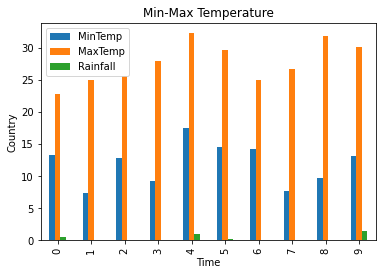

In [2]:
#q6
import matplotlib.pyplot as plt
df[["MinTemp", "MaxTemp", "Rainfall"]].head(10).plot(kind='bar')
plt.xlabel("Time")
plt.ylabel("Country")
plt.title("Min-Max Temperature")
plt.show()

In [18]:
#q7
x = df.loc[df['WindDir9am'] == df['WindDir3pm']]
x

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
5,06-12-2008,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
12,13-12-2008,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
20,21-12-2008,Albury,11.5,29.3,0.0,NaN,NaN,S,24.0,SE,...,56.0,28.0,1019.3,1014.8,NaN,NaN,19.1,27.3,No,No
22,23-12-2008,Albury,20.5,31.8,0.0,NaN,NaN,WNW,41.0,W,...,54.0,24.0,1007.8,1005.7,NaN,NaN,23.8,30.8,No,No
30,31-12-2008,Albury,12.0,24.4,0.8,NaN,NaN,W,39.0,WNW,...,48.0,28.0,1006.1,1005.1,1.0,NaN,16.9,22.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145434,31-05-2017,Uluru,5.4,20.5,0.0,NaN,NaN,E,46.0,E,...,56.0,32.0,1029.2,1025.3,NaN,NaN,11.1,20.2,No,No
145436,02-06-2017,Uluru,1.5,19.2,0.0,NaN,NaN,E,37.0,ESE,...,45.0,18.0,1030.7,1026.7,NaN,NaN,6.8,17.6,No,No
145439,05-06-2017,Uluru,4.9,20.7,0.0,NaN,NaN,E,37.0,ESE,...,38.0,11.0,1027.1,1023.9,NaN,NaN,10.3,19.8,No,No
145442,08-06-2017,Uluru,4.0,20.0,0.0,NaN,NaN,SE,39.0,ESE,...,58.0,26.0,1030.2,1026.7,NaN,NaN,9.1,19.0,No,No


In [21]:
#q8
b = 0
a = 0
for index in df.index:
    if (df['Pressure9am'][index] + df['Pressure3pm'][index]) > b:
        b = df['Pressure9am'][index] + df['Pressure3pm'][index]
        a = index
df["Date"][a], df["Location"][a]

('22-06-2010', 'Launceston')

In [6]:
#q9 Count NaN values under an entire DataFrame:
df.isna().sum().sum()

343248

In [3]:
#Count NaN values under a single DataFrame column:
df['MinTemp'].isna().sum()

1485

In [24]:
#q10
df['YEAR'] = pd.DatetimeIndex(df['Date']).year
print(df['YEAR'])

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
145455    2017
145456    2017
145457    2017
145458    2017
145459    2017
Name: YEAR, Length: 145460, dtype: int64


In [31]:
x = df.groupby('YEAR').count()
x

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
YEAR,,,,,,,,,,,,,,,,,,,,,
2007,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
2008,2270,2270,2259,2262,2245,1931,1947,1817,1818,2178,...,2245,2247,2175,2176,1891,1881,2251,2254,2245,2246
2009,16789,16789,16582,16631,16594,11075,10643,15071,15073,15406,...,16511,16486,15044,15043,11222,10987,16556,16524,16594,16595
2010,16782,16782,16581,16638,16422,10857,10562,15236,15239,15271,...,16487,16536,15158,15164,11250,11099,16515,16550,16422,16419
2011,15407,15407,15337,15361,15125,9610,9354,14379,14381,14371,...,15206,15250,13848,13865,9567,9329,15231,15271,15125,15126
2012,15409,15409,15350,15362,15043,9353,8870,14532,14537,14271,...,14943,14989,14030,14018,9540,9270,15230,15253,15043,15044
2013,16415,16415,16345,16362,16099,9987,8845,15563,15590,15305,...,16237,16226,15031,15043,9646,9597,16294,16334,16099,16097
2014,17885,17885,17767,17807,17398,9658,8728,16694,16696,16410,...,17738,17719,15871,15882,10736,10664,17775,17793,17398,17400
2015,17885,17885,17469,17474,17232,9194,8444,16860,16881,16703,...,17291,16841,15489,15493,10780,10357,17482,17032,17232,17231


In [32]:
x = df.groupby('YEAR').count()['Date']
x

YEAR
2007       61
2008     2270
2009    16789
2010    16782
2011    15407
2012    15409
2013    16415
2014    17885
2015    17885
2016    17934
2017     8623
Name: Date, dtype: int64